# Customer Segmentation with K-Nearest Neighbors(KNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<Axes: xlabel='Gender', ylabel='count'>

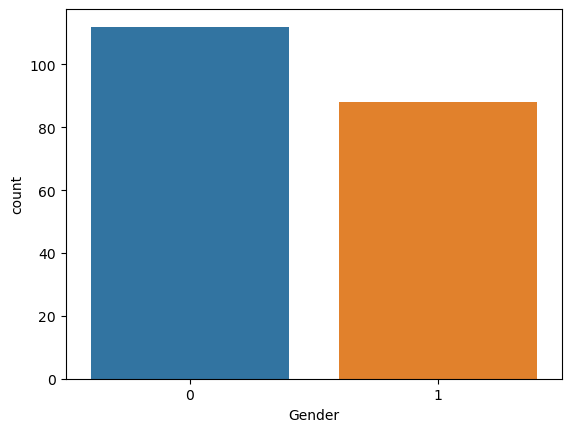

In [19]:
sns.countplot(data,x='Gender')

In [5]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
x=data.iloc[:,:-1]

In [7]:
x.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [8]:
y=data.iloc[:,-1:]
y.head()

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x=sc.fit_transform(x)

In [10]:
sc_x.shape

(200, 4)

In [11]:
sc_x[0]

array([-1.7234121 ,  1.12815215, -1.42456879, -1.73899919])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print('Training Data Shape')
print()
print('Training data-X- shape:\t',xtrain.shape)
print()
print('Training data-Y- shape:\t',ytrain.shape)
print()
print('Testing Data Shape')
print()
print('Testing data(X-Input) shape:\t',xtest.shape)
print()
print('Testing data(Y-Input) shape:\t',ytest.shape)

Training Data Shape

Training data-X- shape:	 (160, 4)

Training data-Y- shape:	 (160, 1)

Testing Data Shape

Testing data(X-Input) shape:	 (40, 4)

Testing data(Y-Input) shape:	 (40, 1)


In [14]:
knn_model=KNeighborsClassifier(n_neighbors=3)
print('***KNN Classifier Model********')
print('Training Phase\n')
knn_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=knn_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***KNN Classifier Model********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]
Test is also done

****************************************************************************************************


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [15]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.025

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_cla

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

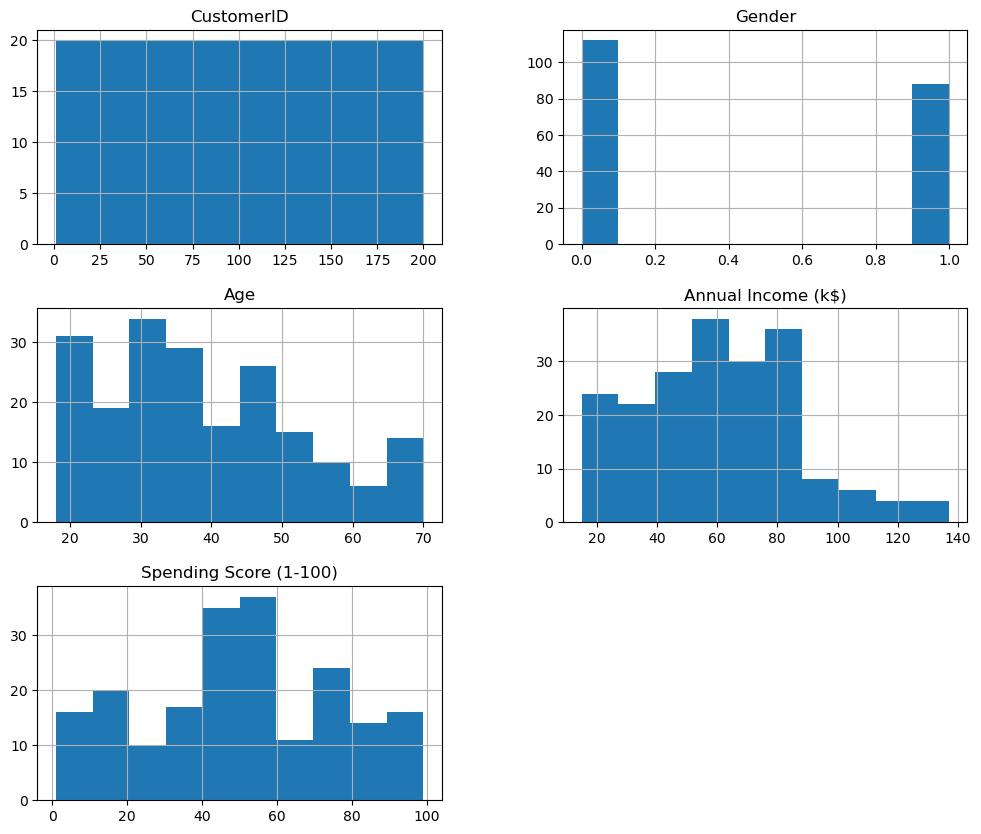

In [16]:
data.hist(figsize=(12,10))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5, 7, 9]
results = {}

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(xtrain, ytrain)
    y_pred = knn_model.predict(xtest)
    print(f"Prdicted Class Labels for K-value {k}: {ypred}")
    print()
    accuracy = accuracy_score(ytest, y_pred)
    results[k] = accuracy

for k, accuracy in results.items():
    print(f"K={k}: Accuracy = {accuracy}")

Prdicted Class Labels for K-value 3: [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]

Prdicted Class Labels for K-value 5: [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]

Prdicted Class Labels for K-value 7: [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]

Prdicted Class Labels for K-value 9: [41 66 14  1  5 46 48 10 14 42 42 17 27 55 14 63 45 16 47 51  5 13 74 42
 51 46 41 51 56  5  6  5 45 55 16 42 71 71 16 42]

K=3: Accuracy = 0.025
K=5: Accuracy = 0.025
K=7: Accuracy = 0.025
K=9: Accuracy = 0.025


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam